<center> <h1>Universidad Nacional de San Agustín de Arequipa</h1> </center> 
<center> <h1>Escuela Profesional de Ingeniería de Telecomunicaciones</h1> </center> 

<center> <h1> </h1> </center> 

<center><img src="https://user-images.githubusercontent.com/19308295/115939517-f1c6fe80-a463-11eb-989c-812ab4942586.png" width="380" height="4200"></center>

<center> <h1>Curso : Computación 2</h1> </center> 

<center> <h2>Docentes: Ingeniero Renzo Bolivar</h2> </center> 

<center> <h2>Alumno: Alanoca Maquera Brandon Yoel</h2> </center> 

<center> <h2>TEMA: WEB SCRAPING</h2> </center> 

## 1.ANALIZAR EL CONTENIDO DE LA PAGINA METACRITIC

In [ ]:
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep
from random import randint
from qgrid import show_grid
import seaborn as sns
#from pandas_profiling import ProfileReport
from funpymodeling.exploratory import freq_tbl, status, profiling_num, cat_vars, num_vars


In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}


In [3]:
pages = [str(i) for i in range(0,10,2)]

In [4]:

contenido = requests.get('https://www.metacritic.com/browse/movies/score/metascore/all/filtered?page=', headers=headers)
soup = BeautifulSoup(contenido.text, 'html.parser')


### 1.1 VISUALIZACION CONTENIDO DE UNA SOLA PELICULA


In [5]:
# buscamos las etiquetas correspondientes

# Buscar la etiquera que gurada toda la informacion 
contenido = soup.find_all('td', class_='clamp-summary-wrap')  
print(type(contenido))

<class 'bs4.element.ResultSet'>


In [6]:
#nos muestra que toma todas las peliculas de la pagina 
len(contenido)


100

In [7]:
#para una sola peliula observamos 
contenido[1]

<td class="clamp-summary-wrap">
<input class="clamp-summary-expand" id="522553" type="checkbox">
<div class="clamp-score-wrap">
<a class="metascore_anchor" href="/movie/the-godfather/critic-reviews">
<div class="metascore_w large movie positive perfect">100</div>
</a>
</div>
<span class="title numbered">
                                                                    2.
                                                            </span>
<a class="title" href="/movie/the-godfather"><h3>The Godfather</h3></a>
<div class="clamp-details">
<span>March 24, 1972</span>
<span class="cert_rating R"> | R</span>
</div>
<div class="summary">
                        Francis Ford Coppola's epic features Marlon Brando in his Oscar-winning role as the patriarch of the Corleone family. Director Coppola paints a chilling portrait of the Sicilian clan's rise and near fall from power in America, masterfully balancing the story between the Corleone's family life and the ugly crime business in which the

In [8]:
#Accedemos a los nombres de las peliculas 
pelicula = contenido[1]
pelicula.find('h3').text


'The Godfather'

In [9]:
#Accedemos a  la fecha de estreno 
fecha=contenido[1]
fecha.select('div.clamp-details span')[0].text


'March 24, 1972'

In [10]:
#calificacion de la pelicula
fecha.select('div.clamp-details span')[1].text

' | R'

In [11]:
#metascore de la pelicula
pelicula.select('a.metascore_anchor div')[0].text

'100'

In [12]:
#puntuacion de la pelicula
pelicula.select('a.metascore_anchor div')[2].text

'9.2'

## 2.GENERAR CODIGO PARA TODAS LAS PAGINAS

In [24]:

# Listas para almacenar los datos extraídos
nombres = []
fecha_de_lanzamiento = []
clasificaciones = []
meta_scores = []
puntuacion_de_usuarios = []


pages = [str(i) for i in range(0,20,2)]
# Iterar por las páginas
for page in pages:
    # Hacer una solicitud GET
    url_pag = get('https://www.metacritic.com/browse/movies/score/metascore/all/filtered?page=' + str(page), headers=headers)
    
    # Pausar el bucle durante 8-20 segundos
    sleep(randint(1, 2))
    
    # Analizar el contenido de la respuesta en un objeto BeautifulSoup
    pel_soup = BeautifulSoup(url_pag.text, 'html.parser')
    
    # Encontrar el contenedor principal peculiar de cada película
    contenido = pel_soup.find_all('td', class_='clamp-summary-wrap')
    
    # Iterar a través de los contenedores
    for cont in contenido:
        # Extraer el nombre de la película
        nombre = cont.find('h3').text.strip()
        nombres.append(nombre)
    
        # Extraer la fecha de lanzamiento
        fecha = cont.select('div.clamp-details span')[0].text.strip()
        fecha_de_lanzamiento.append(fecha)
    
        # Extraer la calificación (verificación de índice)
        clasificacion = cont.select('div.clamp-details span')
        clasificacion = cont.select('div.clamp-details span')[1].text if len(clasificacion) > 1 else 'N/A'
        clasificaciones.append(clasificacion)
      
        #extraer meta scores
        meta_score= cont.select('a.metascore_anchor div')[0].text
        meta_scores.append(meta_score)
    
        #extraer puntuacion de usuarios
        puntuacion_de_usuario = cont.select('a.metascore_anchor div')[2].text
        puntuacion_de_usuarios.append(puntuacion_de_usuario)


In [25]:
#convertimos a Dataframe

pelicula_df = pd.DataFrame({
    'Nombres': nombres,
    'Fecha_de_lanzamiento': fecha_de_lanzamiento,
    'Clasificaciones': clasificaciones,
    'Meta_scores': meta_scores,
    'Puntuacion_de_usuarios': puntuacion_de_usuarios})

pelicula_df


,Nombres,Fecha_de_lanzamiento,Clasificaciones,Meta_scores,Puntuacion_de_usuarios
0,Tokyo Story,"March 13, 1972",| Not Rated,100,8.7
1,The Godfather,"March 24, 1972",| R,100,9.2
2,Citizen Kane,"September 4, 1941",| Approved,100,8.4
3,Rear Window,"September 1, 1954",| TV-G,100,8.7
4,Casablanca,"January 23, 1943",| TV-PG,100,8.8
...,...,...,...,...,...
995,Jodorowsky's Dune,"March 21, 2014",| Not Rated,79,8.2
996,The Five Obstructions,"May 26, 2004",| Unrated,79,6.9
997,Beasts of No Nation,"October 16, 2015",| Not Rated,79,8.2
998,Apollo 10½: A Space Age Childhood,"March 25, 2022",| PG-13,79,7.1


In [26]:
print(pelicula_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Nombres                 1000 non-null   object
 1   Fecha_de_lanzamiento    1000 non-null   object
 2   Clasificaciones         1000 non-null   object
 3   Meta_scores             1000 non-null   object
 4   Puntuacion_de_usuarios  1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB
None


In [27]:

# Guardar el DataFrame como archivo CSV
pelicula_df.to_csv('ruta_del_archivo.csv', index=False)


# 3. ANALISIS DE DATOS 

In [28]:
from matplotlib import pyplot as plt

In [29]:
pel_dfcopia = pelicula_df.copy() 

In [30]:
pel_dfcopia

,Nombres,Fecha_de_lanzamiento,Clasificaciones,Meta_scores,Puntuacion_de_usuarios
0,Tokyo Story,"March 13, 1972",| Not Rated,100,8.7
1,The Godfather,"March 24, 1972",| R,100,9.2
2,Citizen Kane,"September 4, 1941",| Approved,100,8.4
3,Rear Window,"September 1, 1954",| TV-G,100,8.7
4,Casablanca,"January 23, 1943",| TV-PG,100,8.8
...,...,...,...,...,...
995,Jodorowsky's Dune,"March 21, 2014",| Not Rated,79,8.2
996,The Five Obstructions,"May 26, 2004",| Unrated,79,6.9
997,Beasts of No Nation,"October 16, 2015",| Not Rated,79,8.2
998,Apollo 10½: A Space Age Childhood,"March 25, 2022",| PG-13,79,7.1


In [31]:
status(pel_dfcopia)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Nombres,0,0.0,0,0.0,998,object
1,Fecha_de_lanzamiento,0,0.0,0,0.0,865,object
2,Clasificaciones,0,0.0,0,0.0,20,object
3,Meta_scores,0,0.0,0,0.0,19,object
4,Puntuacion_de_usuarios,0,0.0,0,0.0,55,object


In [32]:
pel_dfcopia.isnull().sum()

Nombres                   0
Fecha_de_lanzamiento      0
Clasificaciones           0
Meta_scores               0
Puntuacion_de_usuarios    0
dtype: int64

In [33]:

# Obtener las columnas del DataFrame
columnas = pel_dfcopia.columns

# Imprimir las columnas

print(columnas)

Index(['Nombres', 'Fecha_de_lanzamiento', 'Clasificaciones', 'Meta_scores',
       'Puntuacion_de_usuarios'],
      dtype='object')


In [34]:
print(pel_dfcopia)

                               Nombres Fecha_de_lanzamiento Clasificaciones  \
0                          Tokyo Story       March 13, 1972     | Not Rated   
1                        The Godfather       March 24, 1972             | R   
2                         Citizen Kane    September 4, 1941      | Approved   
3                          Rear Window    September 1, 1954          | TV-G   
4                           Casablanca     January 23, 1943         | TV-PG   
..                                 ...                  ...             ...   
995                  Jodorowsky's Dune       March 21, 2014     | Not Rated   
996              The Five Obstructions         May 26, 2004       | Unrated   
997                Beasts of No Nation     October 16, 2015     | Not Rated   
998  Apollo 10½: A Space Age Childhood       March 25, 2022         | PG-13   
999                             Gandhi    February 25, 1983            | PG   

    Meta_scores Puntuacion_de_usuarios  
0         

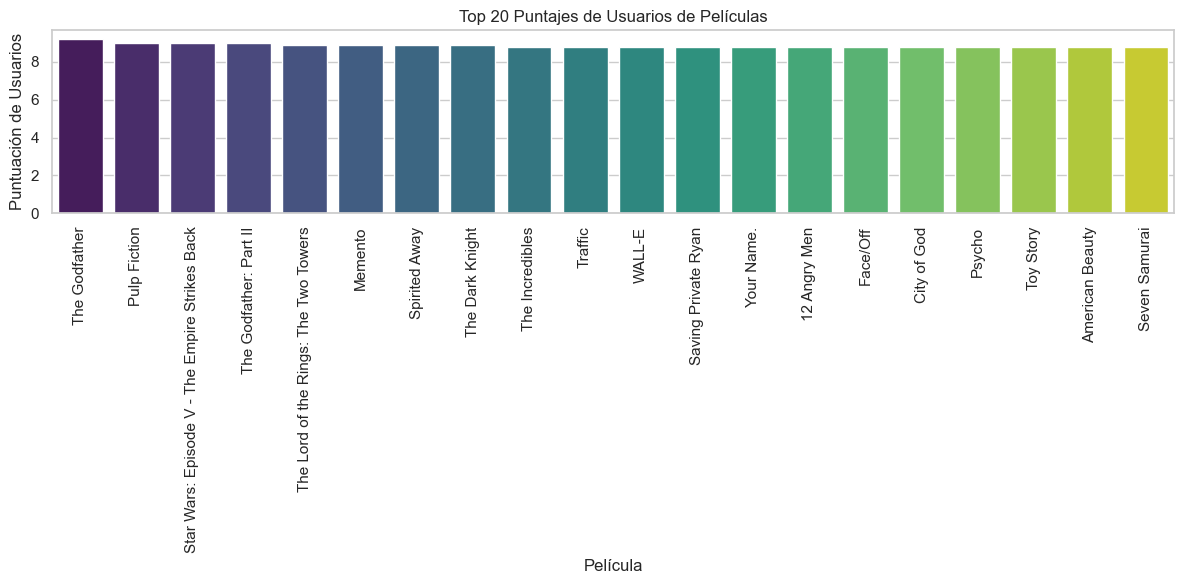

Las 20 películas con los máximos puntajes de usuarios:
                                            Nombres Fecha_de_lanzamiento  \
1                                     The Godfather       March 24, 1972   
88                                     Pulp Fiction     October 14, 1994   
604  Star Wars: Episode V - The Empire Strikes Back         May 21, 1980   
163                          The Godfather: Part II    December 12, 1974   
256           The Lord of the Rings: The Two Towers    December 18, 2002   
778                                         Memento       March 16, 2001   
48                                    Spirited Away   September 20, 2002   
448                                 The Dark Knight        July 18, 2008   
185                                 The Incredibles     November 5, 2004   
361                                         Traffic    December 27, 2000   
89                                           WALL-E        June 27, 2008   
151                             S

In [35]:
#HACEMOS UN GRAFICO DE LOS 20 MAXIMOS 

# Reemplazar los valores no numéricos por NaN
pel_dfcopia['Puntuacion_de_usuarios'] = pd.to_numeric(pel_dfcopia['Puntuacion_de_usuarios'], errors='coerce')

# Ordenar películas por puntuación de usuarios
pel_dfcopia = pel_dfcopia.sort_values("Puntuacion_de_usuarios", ascending=False)

# Seleccionar los 20 máximos puntajes de usuarios
top_20 = pel_dfcopia.nlargest(20, "Puntuacion_de_usuarios")

# Establecer estilo de gráficos de Seaborn
sns.set(style="whitegrid")

# Gráfico de barras de los 20 máximos puntajes de usuarios
plt.figure(figsize=(12, 6))
sns.barplot(data=top_20, x="Nombres", y="Puntuacion_de_usuarios", palette="viridis")
plt.title("Top 20 Puntajes de Usuarios de Películas")
plt.xlabel("Película")
plt.ylabel("Puntuación de Usuarios")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Imprimir las 20 películas con los máximos puntajes de usuarios
print("Las 20 películas con los máximos puntajes de usuarios:")
print(top_20)

